In [2]:
# Importing the required libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv("M:\Imarticus\python project\crop-varietal-identification-with-scio\Barley.data.csv")
df.head()

,Predictor,740,741,742,743,744,745,746,747,748,...,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070
0,HB-52,1.499853,1.500665,1.501564,1.502536,1.503537,1.504548,1.505588,1.506689,1.507828,...,1.636411,1.637350,1.636452,1.634370,1.632287,1.630265,1.630722,1.633166,1.636204,1.637872
1,HB-52,1.530877,1.531669,1.532524,1.533419,1.534308,1.535169,1.536024,1.536916,1.537830,...,1.643299,1.644222,1.643302,1.641195,1.639088,1.637046,1.637493,1.639938,1.642981,1.644649
2,HB-52,1.607175,1.608642,1.610044,1.611357,1.612540,1.613585,1.614534,1.615456,1.616359,...,1.703343,1.704291,1.703329,1.701137,1.698946,1.696822,1.697278,1.699806,1.702953,1.704677
3,HB-52,1.677333,1.678098,1.678930,1.679809,1.680688,1.681539,1.682384,1.683260,1.684145,...,1.755067,1.756013,1.754996,1.752716,1.750441,1.748238,1.748696,1.751290,1.754525,1.756294
4,HB-52,1.507830,1.509293,1.510683,1.511977,1.513145,1.514180,1.515125,1.516049,1.516964,...,1.641968,1.642877,1.641946,1.639829,1.637714,1.635664,1.636101,1.638535,1.641567,1.643227


In [5]:
#collecting indepedent variables in X
X = df.iloc[:,1:332]
X_col = X.columns
X.head()

,740,741,742,743,744,745,746,747,748,749,...,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070
0,1.499853,1.500665,1.501564,1.502536,1.503537,1.504548,1.505588,1.506689,1.507828,1.508937,...,1.636411,1.637350,1.636452,1.634370,1.632287,1.630265,1.630722,1.633166,1.636204,1.637872
1,1.530877,1.531669,1.532524,1.533419,1.534308,1.535169,1.536024,1.536916,1.537830,1.538712,...,1.643299,1.644222,1.643302,1.641195,1.639088,1.637046,1.637493,1.639938,1.642981,1.644649
2,1.607175,1.608642,1.610044,1.611357,1.612540,1.613585,1.614534,1.615456,1.616359,1.617205,...,1.703343,1.704291,1.703329,1.701137,1.698946,1.696822,1.697278,1.699806,1.702953,1.704677
3,1.677333,1.678098,1.678930,1.679809,1.680688,1.681539,1.682384,1.683260,1.684145,1.684969,...,1.755067,1.756013,1.754996,1.752716,1.750441,1.748238,1.748696,1.751290,1.754525,1.756294
4,1.507830,1.509293,1.510683,1.511977,1.513145,1.514180,1.515125,1.516049,1.516964,1.517836,...,1.641968,1.642877,1.641946,1.639829,1.637714,1.635664,1.636101,1.638535,1.641567,1.643227


In [8]:
#collecting depedent variables in Y
Y=df['Predictor']
Y=pd.DataFrame(Y)

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y_encoded = Y.apply(le.fit_transform)
Y_encoded.head()

,Predictor
0,21
1,21
2,21
3,21
4,21


Pre-processing methods are helpful in eliminating noise generated by spectral data. Raw spectral data were thus processed using a combination of scatter corrections that include Standard Normal Variate (SNV) as well as first and second degree derivatives. The Savitzky-Golay and Gap-segment derivative smoothing filtering algorithms also usefull in eliminating noise.

Here I am using Savitzky-Golay filter with second degree derivative.

In [10]:
#Savitzky-Golay filter with second degree derivative.
from scipy.signal import savgol_filter 

sg=savgol_filter(X,window_length=11, polyorder=3, deriv=2, delta=1.0)

In [11]:
sg_x=pd.DataFrame(sg, columns=X_col)
sg_x.head()

,740,741,742,743,744,745,746,747,748,749,...,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070
0,0.000084,0.000073,0.000061,0.000050,0.000039,0.000028,0.000010,-0.000011,-0.000030,-0.000044,...,-0.000446,-0.000474,-0.000300,0.000008,0.000319,0.000781,0.001243,0.001705,0.002167,0.002629
1,0.000033,0.000027,0.000021,0.000014,0.000008,0.000001,-0.000011,-0.000024,-0.000036,-0.000042,...,-0.000446,-0.000474,-0.000300,0.000010,0.000322,0.000786,0.001250,0.001714,0.002178,0.002642
2,-0.000139,-0.000128,-0.000117,-0.000105,-0.000094,-0.000082,-0.000078,-0.000073,-0.000069,-0.000060,...,-0.000462,-0.000491,-0.000310,0.000010,0.000334,0.000815,0.001296,0.001777,0.002258,0.002738
3,0.000055,0.000043,0.000031,0.000020,0.000008,-0.000004,-0.000022,-0.000043,-0.000061,-0.000071,...,-0.000471,-0.000502,-0.000315,0.000014,0.000347,0.000842,0.001337,0.001832,0.002327,0.002822
4,-0.000148,-0.000133,-0.000119,-0.000105,-0.000091,-0.000077,-0.000069,-0.000062,-0.000055,-0.000045,...,-0.000446,-0.000473,-0.000299,0.000010,0.000322,0.000786,0.001249,0.001713,0.002176,0.002640


In [16]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(sg_x, Y_encoded,
                                                    test_size=0.2,
                                                    random_state=123,stratify=Y)

In [24]:
from sklearn.tree import DecisionTreeClassifier

Dtree = DecisionTreeClassifier(random_state=52,criterion='entropy',min_samples_split=50)
Dtree_fit=Dtree.fit(X_train, y_train)

In [25]:
y_pred = Dtree.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Test Result:\n")        
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, y_pred)))
print("Classification Report: \n {}\n".format(classification_report(y_test, y_pred)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test,y_pred))) 

Test Result:

accuracy score: 0.7125

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.43      0.60      0.50        10
           2       0.91      1.00      0.95        10
           3       0.90      0.90      0.90        10
           4       0.67      0.60      0.63        10
           5       0.80      0.80      0.80        10
           6       0.64      0.70      0.67        10
           7       0.67      0.80      0.73        10
           8       0.67      1.00      0.80        10
           9       0.78      0.70      0.74        10
          10       0.82      0.90      0.86        10
          11       0.00      0.00      0.00        10
          12       0.67      0.80      0.73        10
          13       0.90      0.90      0.90        10
          14       0.62      0.50      0.56        10
          15       0.55      0.60      0.57        10
          16      

In [20]:
#Reduction of variables using Recursive Feature Elimination(RFE) techineque.

from sklearn.feature_selection import RFE

# RFE with 10 features

rfe_10 = RFE(Dtree ,10)

rfe_10.fit(X_train, y_train)

# selected features
features_bool = np.array(rfe_10.support_)
features = np.array(X_col)
result = features[features_bool]
print('10 selected Features:')
print(result)

10 selected Features:
['781' '789' '845' '955' '1000' '1002' '1019' '1052' '1056' '1064']


In [28]:
y_pred = rfe_10.predict(X_test)

print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, y_pred))) 

accuracy score: 0.6125

Confusion Matrix: 
 [[ 5  0  0  0  0  1  0  0  0  2  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0  0  2  0  0  1  0  0  0  1  0  2  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  5  0  0  0  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  7  0  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  2  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  2  0  0  6  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  8  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  1  0  0  0  0  0  1  0  1  0  0  0  0  1  5  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  8  0  0  0  0  0 

In [29]:
# RFE with 15 features

rfe_15 = RFE(Dtree ,15)

# fit with 15 features
RFE15_fit=rfe_15.fit(X_train, y_train)

# selected features
features_bool = np.array(rfe_15.support_)
features = np.array(X_col)
result = features[features_bool]
print('15 selected Features:')
print(result)

15 selected Features:
['750' '757' '781' '789' '845' '866' '921' '955' '993' '1000' '1002'
 '1019' '1052' '1056' '1064']


In [30]:
y_pred = rfe_15.predict(X_test)

print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, y_pred))) 

accuracy score: 0.6917

Confusion Matrix: 
 [[ 8  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  1  0  0  0  0  0  0  1  0  0  1  0  0  0  2  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  1  0  0  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  6  0  0  0  0  0  2  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  6  1  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  1  6  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  8  0  0  0  0  0 

In [32]:
# RFE with 17 features

rfe_17 = RFE(Dtree,17)

# fit with 17 features
rfe_17.fit(X_train, y_train)

# selected features
features_bool = np.array(rfe_17.support_)
features = np.array(X_col)
result = features[features_bool]
print('17 selected Features:')
print(result)

17 selected Features:
['750' '757' '781' '789' '841' '845' '847' '866' '921' '955' '993' '1000'
 '1002' '1019' '1052' '1056' '1064']


In [33]:

y_pred = rfe_17.predict(X_test)

print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, y_pred))) 

accuracy score: 0.6958

Confusion Matrix: 
 [[ 8  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  1  0  0  0  0  0  0  1  0  0  1  0  0  0  2  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  1  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  7  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  6  1  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  1  6  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  8  0  0  0  0  0 

In [34]:
# RFE with 20 features

rfe_20 = RFE(Dtree,20)

# fit with 20 features
rfe_20.fit(X_train, y_train)

# selected features
features_bool = np.array(rfe_20.support_)
features = np.array(X_col)
result = features[features_bool]
print('20 selected Features:')
print(result)

20 selected Features:
['750' '757' '781' '783' '788' '789' '841' '845' '847' '866' '914' '921'
 '955' '993' '1000' '1002' '1019' '1052' '1056' '1064']


In [36]:
y_pred = rfe_20.predict(X_test)

print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, y_pred))) 

accuracy score: 0.7000

Confusion Matrix: 
 [[ 8  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  1  0  0  0  0  0  0  1  0  0  1  0  0  0  1  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  6  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  7  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  7  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  6  1  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  1  6  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  8  0  0  0  0  0 

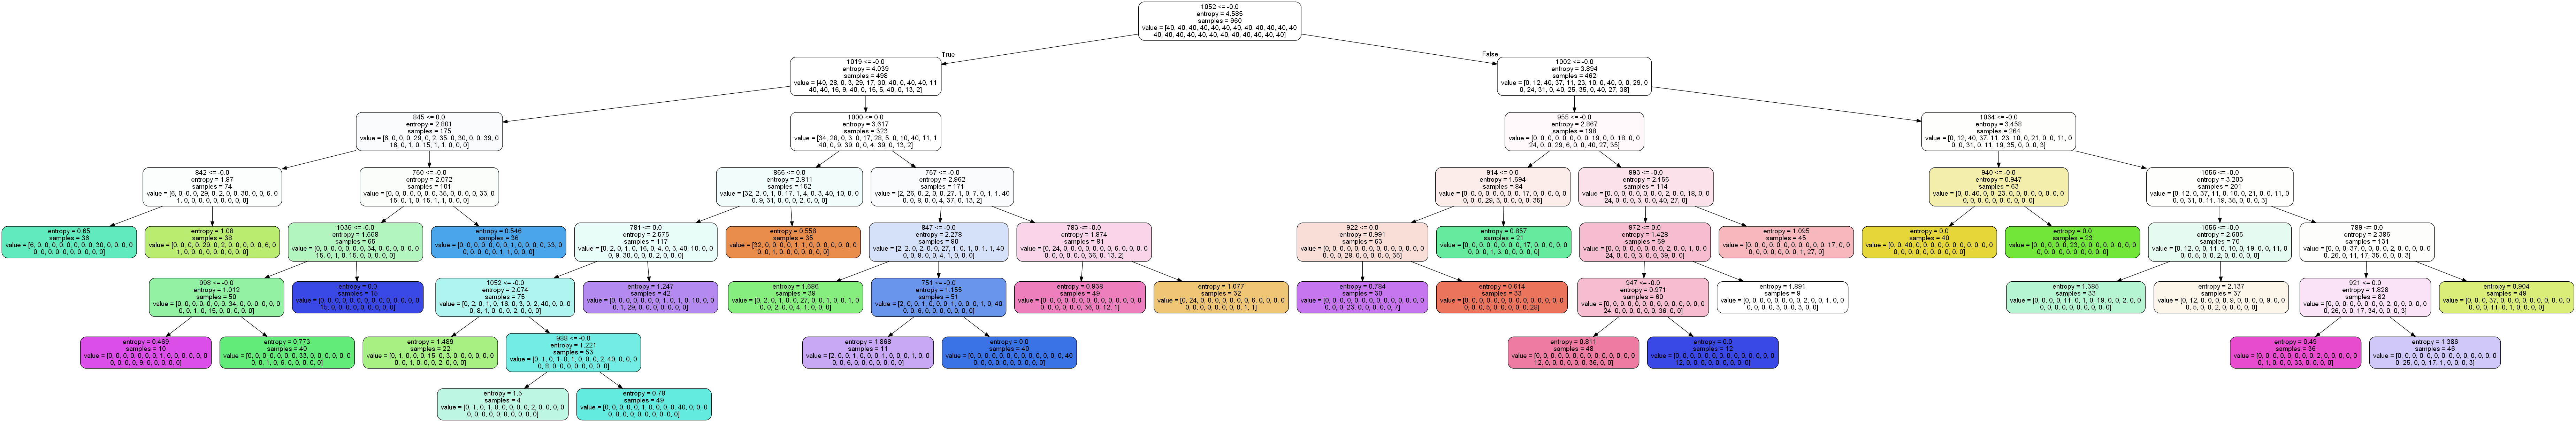

In [37]:
#Ploting Decision Tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = StringIO()
export_graphviz(Dtree_fit, out_file=dot_data,feature_names=X_col,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [38]:
def get_code(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value

        def recurse(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        print ("if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node])
                        print ("} else {")
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node])
                        print( "}")
                else:
                        print ("return " + str(value[node]))

        recurse(left, right, threshold, features, 0)

In [39]:
get_code(Dtree, X_col)

if ( 1052 <= -5.394840627559461e-05 ) {
if ( 1019 <= -2.8599895358638605e-06 ) {
if ( 845 <= 6.620709882554365e-06 ) {
if ( 842 <= -3.4984483136213385e-05 ) {
return [[ 6.  0.  0.  0.  0.  0.  0.  0.  0. 30.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]]
} else {
return [[ 0.  0.  0.  0. 29.  0.  2.  0.  0.  0.  0.  0.  6.  0.  1.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]]
}
} else {
if ( 750 <= -5.819131729367655e-06 ) {
if ( 1035 <= -7.006814939813921e-06 ) {
if ( 998 <= -4.75686010759091e-06 ) {
return [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 9. 0. 0. 0. 0. 0.]]
} else {
return [[ 0.  0.  0.  0.  0.  0.  0. 33.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
   6.  0.  0.  0.  0.  0.]]
}
} else {
return [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 15.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]]
}
} else {
return [[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0. 33.  0.  0.  0.  0.  0.
   0.  1.  1.  0.  0.  0.]]
}
}
} else {
if ( 1000 <= 8.799199349596165e-

In [40]:
#collecting variables selected by Rfe 15 in X_imp
X_imp=sg_x[['750','757','781','789','845','866','921','955',
         '993','1000','1002','1019','1052','1056','1064']]
X_col_imp=X_imp.columns
X_imp.head()

,750,757,781,789,845,866,921,955,993,1000,1002,1019,1052,1056,1064
0,-0.000045,0.000009,-0.000022,-0.000005,-0.000006,-0.000020,0.000030,-0.000024,-0.000081,0.000068,-0.000042,-0.000167,0.000071,0.000251,0.000008
1,-0.000037,0.000006,-0.000017,-0.000007,-0.000014,-0.000007,0.000024,-0.000028,-0.000094,0.000061,-0.000043,-0.000172,0.000069,0.000251,0.000010
2,-0.000044,0.000010,-0.000012,-0.000012,0.000007,-0.000016,0.000007,-0.000029,-0.000085,0.000080,-0.000034,-0.000180,0.000073,0.000262,0.000010
3,-0.000067,0.000027,-0.000013,-0.000019,0.000001,-0.000011,0.000010,-0.000015,-0.000092,0.000077,-0.000039,-0.000194,0.000081,0.000275,0.000014
4,-0.000029,0.000007,-0.000022,-0.000007,-0.000003,-0.000023,0.000023,-0.000013,-0.000080,0.000079,-0.000033,-0.000177,0.000070,0.000252,0.000010


In [41]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 =train_test_split(X_imp, Y,
                                                    test_size=0.2,
                                                    random_state=123,stratify=Y)
X_train1.head()

,750,757,781,789,845,866,921,955,993,1000,1002,1019,1052,1056,1064
1121,6.593828e-06,0.000007,0.000007,-0.000004,0.000013,0.000003,0.000015,0.000001,0.000034,9.112335e-05,0.000061,0.000007,-0.000066,0.000267,-0.000009
880,2.855045e-05,-0.000030,-0.000002,0.000004,0.000030,-0.000009,0.000055,0.000001,0.000022,9.857941e-05,0.000069,0.000020,-0.000068,0.000306,0.000004
408,3.041636e-05,0.000020,0.000008,0.000023,0.000015,-0.000061,0.000002,-0.000041,0.000048,6.162564e-07,0.000039,0.000119,0.000097,-0.000092,-0.000100
1176,-2.771422e-07,0.000032,0.000024,-0.000003,0.000015,-0.000056,0.000020,-0.000041,0.000054,-3.058916e-06,0.000034,0.000103,0.000101,-0.000095,-0.000117
283,-6.506920e-05,0.000026,-0.000033,0.000018,-0.000017,-0.000015,0.000019,-0.000019,-0.000056,8.393719e-05,-0.000041,-0.000182,0.000086,0.000279,0.000014


In [42]:
from sklearn.tree import DecisionTreeClassifier

Dtree1 = DecisionTreeClassifier(random_state=52,criterion='entropy',min_samples_split=50)
Dtree_fit1=Dtree1.fit(X_train1, y_train1)

In [43]:
y_pred1 = Dtree1.predict(X_test1)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Test Result:\n")        
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test1, y_pred1)))
print("Classification Report: \n {}\n".format(classification_report(y_test1, y_pred1)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test1,y_pred1)))

Test Result:

accuracy score: 0.6917

Classification Report: 
               precision    recall  f1-score   support

 Ardu 1260 B       1.00      0.80      0.89        10
      Bahati       0.38      0.50      0.43        10
    Bekoji-1       1.00      1.00      1.00        10
 Cross 41/98       0.90      0.90      0.90        10
      Deribe       0.71      0.50      0.59        10
       Dimtu       0.73      0.80      0.76        10
     EH 1493       0.67      0.60      0.63        10
     EH 1847       0.70      0.70      0.70        10
    Explorer       0.62      1.00      0.77        10
       Grace       0.60      0.60      0.60        10
     HB-1307       0.75      0.90      0.82        10
     HB-1533       0.00      0.00      0.00        10
     HB-1963       0.67      0.80      0.73        10
     HB-1964       0.73      0.80      0.76        10
     HB-1965       0.64      0.90      0.75        10
     HB-1966       0.55      0.60      0.57        10
 IBON 174/03      

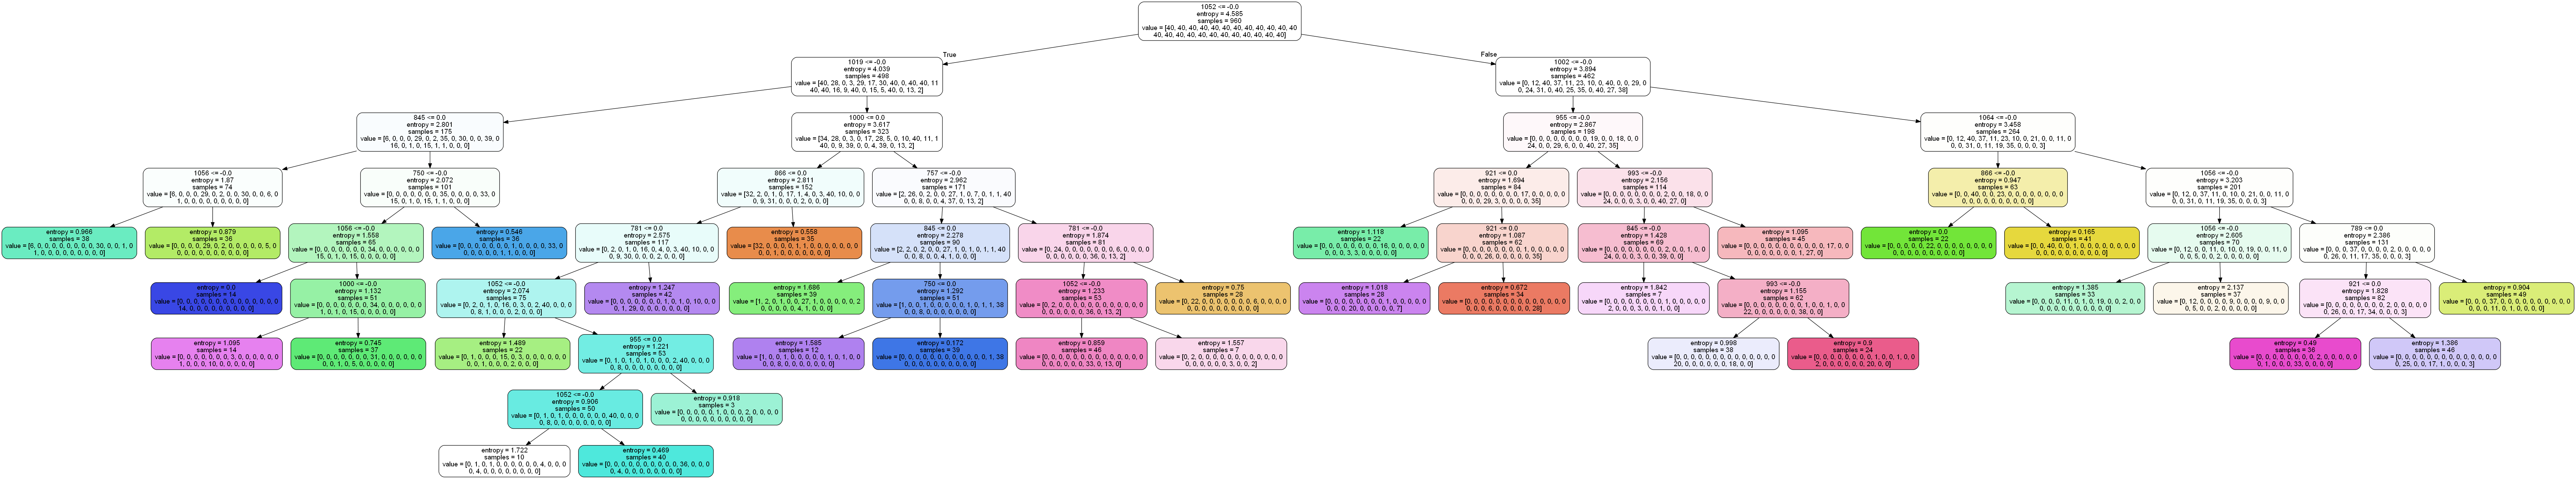

In [45]:
#Ploting Decision Tree
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = StringIO()
export_graphviz(Dtree_fit1, out_file=dot_data,feature_names=X_col_imp,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [46]:
 get_code(Dtree1, X_col)

if ( 752 <= -5.394840627559461e-05 ) {
if ( 751 <= -2.8599895358638605e-06 ) {
if ( 744 <= 6.620709882554365e-06 ) {
if ( 753 <= -8.530757622793317e-05 ) {
return [[ 6.  0.  0.  0.  0.  0.  0.  0.  0. 30.  0.  0.  1.  0.  1.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]]
} else {
return [[ 0.  0.  0.  0. 29.  0.  2.  0.  0.  0.  0.  0.  5.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]]
}
} else {
if ( 740 <= -5.819131729367655e-06 ) {
if ( 753 <= -8.974350566859357e-05 ) {
return [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 14.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]]
} else {
if ( 749 <= -2.5375074073963333e-05 ) {
return [[ 0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  10.  0.  0.  0.  0.  0.]]
} else {
return [[ 0.  0.  0.  0.  0.  0.  0. 31.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
   5.  0.  0.  0.  0.  0.]]
}
}
} else {
return [[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0. 33.  0.  0.  0.  0.  0.
   0.  1.  1.  0.  0.  0.]]
}
}
} else {
if ( 749

conclusion:-
Decision Tree is giving accuracy of 71% using all 331 variables.
If we reduce Variables using techineque Recursive Feature Elimination(RFE),using 15 variables('750','757','781','789','845','866','921','955','993','1000','1002','1019','1052','1056'&'1064') model is giving acurracy of 69%.Further increase in Variables will not affecting model accuracy as much.  